Saving employee_attrition - Sheet1.csv to employee_attrition - Sheet1 (1).csv
===== FIRST 5 ROWS =====
  Employee_ID  Age Department           Job_Role  Monthly_Income  \
0        E001   29      Sales    Sales Executive           45000   
1        E002   35         HR         HR Manager           52000   
2        E003   28         IT  Software Engineer           60000   
3        E004   42    Finance         Accountant           58000   
4        E005   31      Sales    Sales Executive           47000   

   Years_at_Company Overtime  Job_Satisfaction Attrition  
0                 3      Yes               4.0        No  
1                 7       No               3.0        No  
2                 2      Yes               2.0       Yes  
3                10       No               4.0        No  
4                 4      Yes               3.0       Yes  

===== DATASET SHAPE =====
(15, 9)

===== MISSING VALUES =====
Employee_ID         0
Age                 0
Department          0
Job_R

/tmp/ipython-input-2336507241.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Job_Satisfaction'].fillna(df['Job_Satisfaction'].mean(), inplace=True)


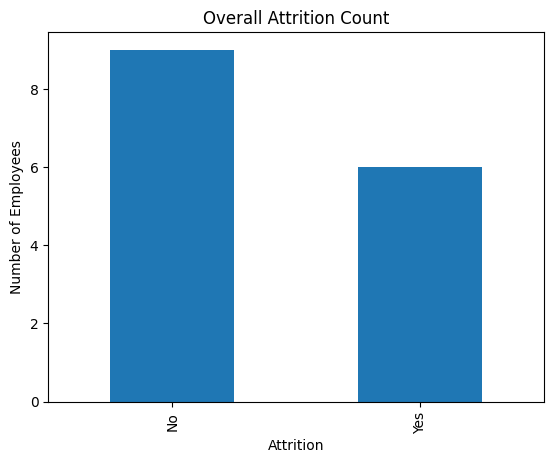

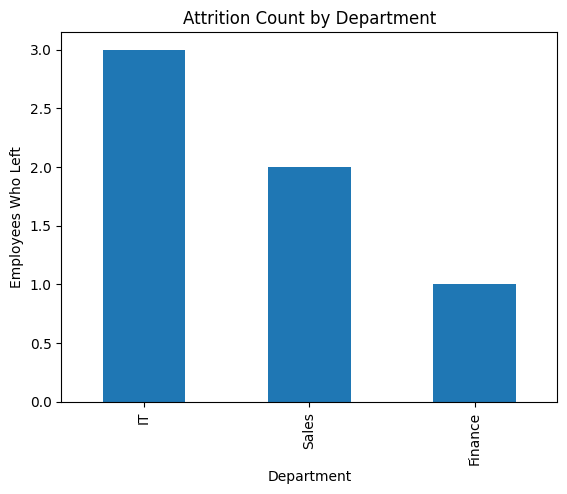

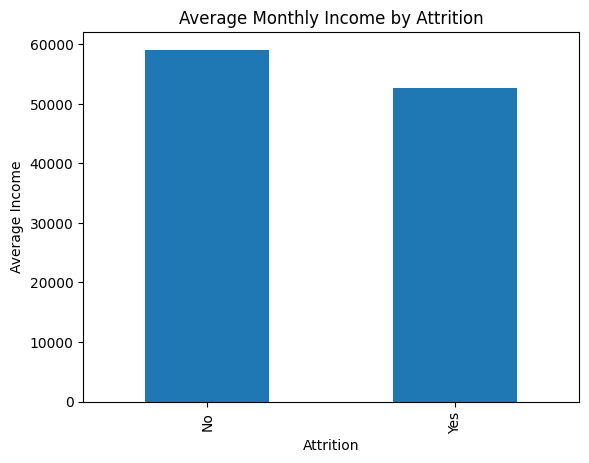

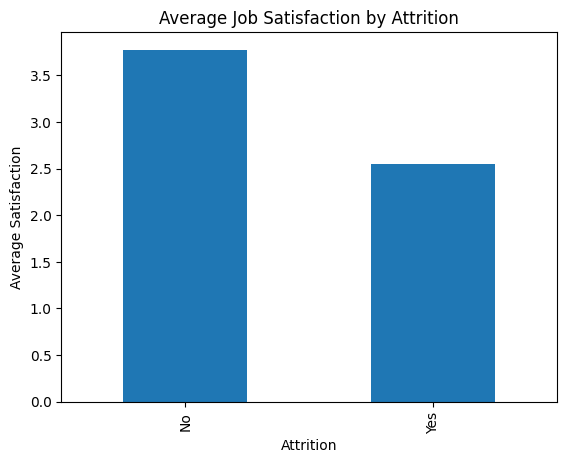


===== FINAL INSIGHTS =====
1. Overall attrition rate shows workforce stability level.
2. Certain departments show higher employee exits.
3. Lower job satisfaction is linked with higher attrition.
4. Income differences may influence employee retention.


In [1]:
# ================================
# EMPLOYEE ATTRITION - COMPLETE EDA
# ================================

# Step 1: Upload File
from google.colab import files
uploaded = files.upload()

# Step 2: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Load Dataset
df = pd.read_csv('employee_attrition - Sheet1.csv')

print("===== FIRST 5 ROWS =====")
print(df.head())

print("\n===== DATASET SHAPE =====")
print(df.shape)

print("\n===== MISSING VALUES =====")
print(df.isnull().sum())

# Handle Missing Values
df['Job_Satisfaction'].fillna(df['Job_Satisfaction'].mean(), inplace=True)

print("\n===== AFTER HANDLING MISSING VALUES =====")
print(df.isnull().sum())

# ================================
# ATTRITION ANALYSIS
# ================================

print("\n===== OVERALL ATTRITION RATE =====")
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print(attrition_rate)

print("\n===== ATTRITION BY DEPARTMENT (%) =====")
attrition_by_dept = pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100
print(attrition_by_dept)

# ================================
# VISUALIZATIONS
# ================================

# 1️⃣ Overall Attrition
plt.figure()
df['Attrition'].value_counts().plot(kind='bar')
plt.title("Overall Attrition Count")
plt.xlabel("Attrition")
plt.ylabel("Number of Employees")
plt.show()

# 2️⃣ Attrition by Department
plt.figure()
dept_yes = df[df['Attrition'] == 'Yes']['Department'].value_counts()
dept_yes.plot(kind='bar')
plt.title("Attrition Count by Department")
plt.xlabel("Department")
plt.ylabel("Employees Who Left")
plt.show()

# 3️⃣ Average Monthly Income by Attrition
plt.figure()
avg_income = df.groupby('Attrition')['Monthly_Income'].mean()
avg_income.plot(kind='bar')
plt.title("Average Monthly Income by Attrition")
plt.ylabel("Average Income")
plt.show()

# 4️⃣ Average Job Satisfaction by Attrition
plt.figure()
avg_satisfaction = df.groupby('Attrition')['Job_Satisfaction'].mean()
avg_satisfaction.plot(kind='bar')
plt.title("Average Job Satisfaction by Attrition")
plt.ylabel("Average Satisfaction")
plt.show()

print("\n===== FINAL INSIGHTS =====")
print("1. Overall attrition rate shows workforce stability level.")
print("2. Certain departments show higher employee exits.")
print("3. Lower job satisfaction is linked with higher attrition.")
print("4. Income differences may influence employee retention.")